## Librerias y carga de base de datos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

## Carga de Base de datos

In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv')
target_column = 'Car Purchase Amount'  #  variable dependiente Y
feature_columns = ['Age', 'Annual Salary', 'Net Worth']  # variables independientes X

#1.	Describa su dataset en términos de las variables independientes (predictores, características), cuál es la variable de salida o dependiente y cuántas muestras tiene el dataset

In [4]:
num_samples = df.shape[0]
# Variables dependiente e independiente
if target_column in df.columns:
  dependent_variable = target_column
  independent_variables = [col for col in df.columns if col != target_column]
else:
  raise ValueError(f"La columna '{target_column}' no se encuentra en el dataset.")

# Muestra la descripción del dataset (Un poco a la modificación)
print(f"El dataset contiene {num_samples} muestras.")
print(f"Variable dependiente: {dependent_variable}")
print(f"Variables independientes: {independent_variables}")

El dataset contiene 500 muestras.
Variable dependiente: Car Purchase Amount
Variables independientes: ['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']


El dataset contiene 500 muestras, donde tomamos a "car Purchase Amount" (Importe de la compra del coche) como la variable dependiente (Y). A su vez, se selecionan como variables independientes (X), el "Annual Salary", "Credit card Debt", "Age", y "Net Worth" como posibles variables que puedan afectar en gran medida a la variable dependiente. El resto de variables no son escogidas debido a que no presentan valores relevantes, como "Customer Name" o "Customer e-mail", ya que son irrelevantes. El género (Gender) se puede  ignorar y la nacionalidad "Country" solo tiene un valor, que es "USA", por lo que la predicción de compra de carros con este dataset está más relacionado con la población de Estados Unidos.

Variables independientes recomendadas para usar:


* Edad: **(Age)**
* Salario Anual:  **(Annual Salary)**
* Deuda de tarjeta de crédito: **(Credit Card Debt)**
* Patrimonio neto (activo – pasivo): **(Net Worth)**
```
['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
```

Variable dependiente escogida:

* Importe de la compra del coche: **Car Purchase Amount**
```
['Car Purchase Amount']
```



# 2.	Seleccione tres características y observe su relación con la variable de salida. Puede utilizar la librería pandas.plotting.scatter_matrix para la visualización de sus datos. Interprete sus resultados.

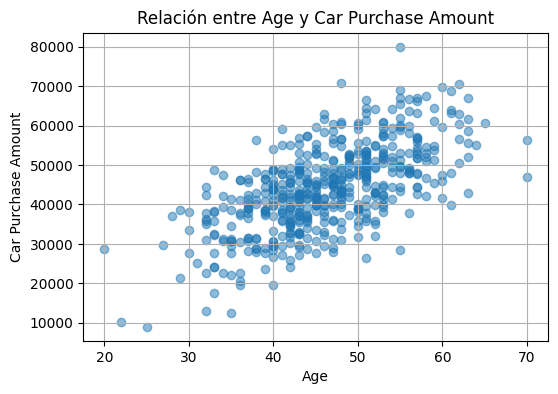

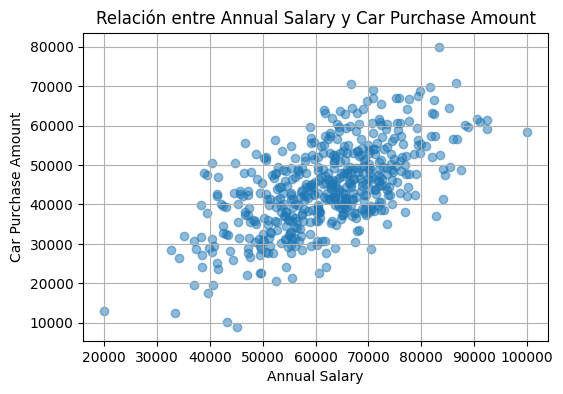

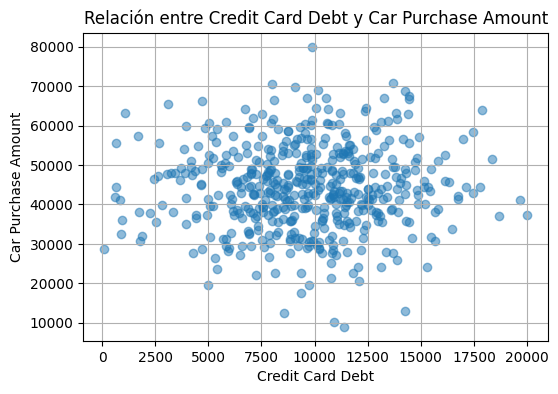

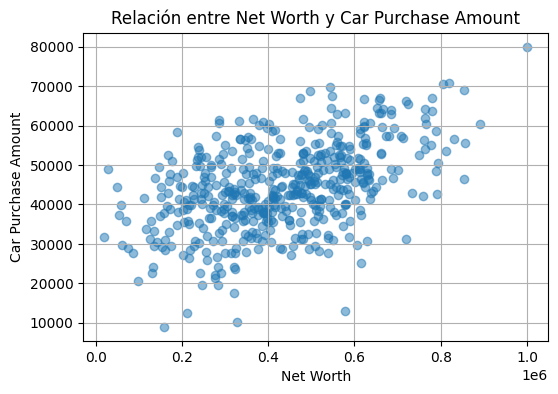

In [5]:
feature_columnsss = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']  # variables independientes X, escogidos por aparte
for feature in feature_columnsss:
  plt.figure(figsize=(6, 4))
  plt.scatter(df[feature], df[target_column], alpha=0.5)
  plt.title(f'Relación entre {feature} y {target_column}')
  plt.xlabel(feature)
  plt.ylabel(target_column)
  plt.grid(True)
  plt.show()


# Muestra gráficos de cada variable independiente con relación a la dependiente
plt.show()

A partir de los gráficos mostrados anteriormente, podemos interpretar lo siguiente:
* **Edad y Salario Anual** : La variable **"Edad o Age"** y **"Salario Anual o Anual Salary"** tienen una relación ascendente con respecto a la compra de un carro. Esto puede indicar que, a mayor edad, una persona tiende a comprar autos más caros. Lo mismo ocurre con la variable "Salario Anual" donde a mayor es el salario, mayor es la tendencia a comprar autos más costosos. No obstante, si combinamos estas dos variables, obtenemos una representación de la "Experiencia laboral" ,donde, a pasar los años en la que una persona adquiere experiencia laboral, puede ascender laboralmente, lo que aumenta su salario y responsabilidades. Este factor puede determinar que aquellos individuos con cargos importantes suelen escoger autos más costosos en términos de calidad, seguridad y elegancia.

* **Deudas de targeta de credito**: En la variable **"Credit Card Debt"** la mayor parte de los datos se encuentran dispersos con respecto a la variable dependiente. Si nos esforzamos por encontrar una relación lineal, esta parece ser casi horizontal, lo que puede representar que no es una buena variable adecuada para predecir la variable dependiente.

* **Patrimonio Neto**: En la variable **"Net Worth"** los datos se presentan un poco dispersos, pero parece haber una relación positiva con la variable dependiente. Puede ser una variable buena o útil para predecir la compra de un carro, aunque no tanto como se mostró en **"Salario Anual"** y **"Edad"**

# 3.	Ajuste un modelo de regresión lineal para estimar la variable dependiente a partir de los predictores o características.

In [7]:
# variables dependientes e independientes
X = df[['Age', 'Annual Salary', 'Net Worth']]  # Características (predictores)
y = df['Car Purchase Amount']  # Variable dependiente (target)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Imprimir los coeficientes y el intercepto
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intercepto de la regresión: {model.intercept_}")

Coeficientes de la regresión: [8.39836163e+02 5.62212122e-01 2.89284198e-02]
Intercepto de la regresión: -42021.38537369257


Se utiliza la librería skLearn para crear el modelo de regresión lineal que predice el valor de Car Purchase Amount en función de las variables predictoras Age, Annual Salary, y Net Worth. Además, utilizamos funciones para devolver los coeficientes asociados a las variables predictoras (x) y el intercepto que representa el punto donde la línea de regresión corta el eje y.


## 3.1.	Para estimar el error del modelo, emplee un porcentaje de los datos para entrenarlo y otro para validarlo. Cambie las proporciones de los conjuntos y observe los resultados (70-30, 50-50, 40-60).

##¿De qué forma afecta el desempeño del modelo el usar diferentes proporciones de train/test set?

In [8]:
# Proporciones de los conjuntos de entrenamiento y prueba
proporciones = [0.3, 0.5, 0.6]

for test_size in proporciones:
  # division en datos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Ajuste del modelo de regresión lineal
  model = LinearRegression()
  model.fit(X_train, y_train)

  # predicción de caracteristicas
  y_pred = model.predict(X_test)

  # Calcular el error cuadrático medio y el coeficiente de determinación R^2
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f'Proporción Train/Test: {1-test_size}-{test_size}')
  print(f'MSE: {mse:.2f}, Coeficiente de determinación: {r2:.4f}')
  print('-' * 40)

Proporción Train/Test: 0.7-0.3
MSE: 62502.42, Coeficiente de determinación: 0.9994
----------------------------------------
Proporción Train/Test: 0.5-0.5
MSE: 58384.74, Coeficiente de determinación: 0.9995
----------------------------------------
Proporción Train/Test: 0.4-0.6
MSE: 57701.25, Coeficiente de determinación: 0.9995
----------------------------------------


El uso de diferentes proporciones de train/test set puede afectar la capacidad de generalización del modelo, donde un mayor conjunto de entrenamiento tiende a mejorar la capacidad del modelo para generalizar, pero un conjunto demasiado pequeño puede llevarnos al sobreajuste de los datos.

El MSE entre los valores reales y predichos, a medida que presenta un valor bajo, indica un mejor desempeño. En este caso, vemos que al reducir el tamaño de train set, el MSE disminuye:

*  0.7-0.3 = 62502.42
*  0.5-0.5 = 58384.74
*  0.4-0.6 = 57701.25

Con esto, el modelo funciona incluso con menos datos de entrenamiento, ya que no se observa un incremento en el error. Por lo tanto, sería más conveniente utilizar la proporción (40-60). La reducción del tamaño de datos de entrenamiento no afecta negativamente el desempeño del modelo de forma significativa, por el contrario, se obtienen mejores resultados.

Por otra lado, en cuanto al coeficiente de determinación, este valor representa el comportamiento de la variabilidad de los predictores. Al observar los resultados:

* 0.7-0.3 = 0.9994
* 0.5-0.5 = 0.9995
* 0.4-0.6 = 0.9995

Vemos que el modelo obtiene la mayoría de la variabilidad de los datos, por lo que la precisión es alta para este modelo en todas las proporciones train/test realizadas, y está prediciendo mejor el modelo, ya que los resultados son bastante cercanos a 1. En este caso, los mejores resultados se obtienen con las proporciones (50-50) y (40-60). Es posible que para datos nuevos el modelo tenga problemas de generalización, ya que podría estar demasidado ajustado (sobreajuste) a las caracteristicas del train set. No obstante, para este conjunto de datos, el modelo es estable y generaliza sin problemas.

## 3.2.	Cambie el método de optimización de su modelo (por ejemplo, Stochastic Gradient Descent). ¿Su modelo presenta algún cambio?

In [9]:
proporciones = [0.3, 0.5, 0.6]
def sgdModel(test_size, X, y, max_iter=1000, learning_rate='constant'):
  # división de los datos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Escalar las características
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # creamos y ajustamos el modelo de regresión utilizando SGD
  sgd_model = SGDRegressor(max_iter=max_iter, learning_rate=learning_rate, eta0=0.01, random_state=42)
  sgd_model.fit(X_train_scaled, y_train)

  y_pred = sgd_model.predict(X_test_scaled)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # proporciones de train/test
  print(f'Proporción train/test: {100*(1-test_size):.0f}-{100*test_size:.0f} (SGD)')
  print(f'MSE (SGD): {mse:.2f}')
  print(f'Coeficiente de determinación (SGD): {r2:.4f}')
  print('-' * 40)
  return mse, r2

print("Resultados usando Stochastic Gradient Descent:")
for test_size in proporciones:
  sgdModel(test_size, X, y)

Resultados usando Stochastic Gradient Descent:
Proporción train/test: 70-30 (SGD)
MSE (SGD): 62121.81
Coeficiente de determinación (SGD): 0.9994
----------------------------------------
Proporción train/test: 50-50 (SGD)
MSE (SGD): 61344.58
Coeficiente de determinación (SGD): 0.9995
----------------------------------------
Proporción train/test: 40-60 (SGD)
MSE (SGD): 56840.88
Coeficiente de determinación (SGD): 0.9995
----------------------------------------


Los resultados utilizando sgd y regresión lineal son similares tanto en el MSE como en el coeficiente de determinación, por lo que, ambas técnicas ofrecen un buen desempeño en el modelo para este set de datos. En este caso, no se presenta algun cambio significativo en el modelo, por lo que, no encontramos alguna ventaja de utilizar el método sgd sobre la regresión lineal.

Se obtienen  valores altos y cercanos a 1 en el coeficiente de determinación, y el MSE disminuye al reducir los datos de entrenamiento, lo que resutla en un método preciso. No obstante, también existe la posibilidad de presentar un sobreajuste debido al valor elevado de $R^2$.

Utilizar la técnica de sgd sería más beneficioso en problemas de alta complejidad, donde, podría converger si los datos no están bien escalados o la tasa de aprendizaje no se ajusta adecuadamente. En nuestro caso, al contar con un tamaño de dataset pequeño, obtenemos desempeños similares al utilizar el modelo sgd y la regresión lineal ordinaria.

## 3.3.	Utilice un método de regularización en su modelo. ¿De qué forma afecta el desempeño del modelo usar un método de regularización?

In [11]:
proporciones = [0.3, 0.5, 0.6]
# Función para entrenar y evaluar el modelo con Ridge
def Regularizacion(test_size, X, y, regularizacion='ridge', alpha=1.0):
  # división de los datos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # crear modelo de regularización L2
  model = Ridge(alpha=alpha)
  model.fit(X_train_scaled, y_train)

  # Hacer predicciones
  y_pred = model.predict(X_test_scaled)

  #  MSE y coeficiente de determinación
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # proporciones de train/test
  print(f'Proporción train/test: {100*(1-test_size):.0f}-{100*test_size:.0f}')
  print(f'MSE(Ridge): {mse:.2f}')
  print(f'Coeficiente de determinación (Ridge): {r2:.4f}')
  print('-' * 40)
  return mse, r2

# evaluar datos de proporciones
print("Resultados usando regularización Ridge:")
for test_size in proporciones:
  Regularizacion(test_size, X, y, regularizacion='ridge', alpha=1.0)


Resultados usando regularización Ridge:
Proporción train/test: 70-30
MSE(Ridge): 64181.98
Coeficiente de determinación (Ridge): 0.9994
----------------------------------------
Proporción train/test: 50-50
MSE(Ridge): 63716.43
Coeficiente de determinación (Ridge): 0.9995
----------------------------------------
Proporción train/test: 40-60
MSE(Ridge): 65911.16
Coeficiente de determinación (Ridge): 0.9995
----------------------------------------


La regularización ayuda a controlar la magnitud de los coeficientes del modelo, esto permite evitar el sobreajuste de los datos. Al observar los resultados, vemos que la regularización con Ridge afecta el desempeño del modelo en sus coeficientes.  

Analizando los MSE, los valores son más altos que los obtenidos anteriormente. Incluso aumentan ligeramente a medida que se reduce la proporción del train/test set, lo cual puede ser positivo si se quisiera evitar el sobreajuste de los datos. Además, no representa un cambio significativo en la precisión de los resultados. El mejor desempeño se obtiene con la proporción (50-50).

En cuanto al coeficiente de determinación, vemos que se mantiene similar a los obtenidos con las técnicas anteriores, lo que indica que Ridge no reduce la capacidad del modelo para capturar la variabilidad de los datos, manteniendose cercano a 1.

Se recomendaría utilizar Ridge en un conjunto de datos más complejo o en situaciones con mayor riesgo de sobreajuste.


## 3.4.	De acuerdo con los resultados anteriores, seleccione una proporción para dividir el set de entrenamiento, un método de optimización y uno de regularización. Obtenga los parámetros de su modelo (pesos e intersección). ¿Cuál es el significado de la magnitud y signo de estos valores?

In [12]:
# test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ajuste modelo usando ridge y sgd
sgdRidge = SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
sgdRidge.fit(X_train_scaled, y_train)

# Imprimir los coeficientes y el intercepto
print(f"Coeficientes: {sgdRidge.coef_}")
print(f"Intercepto: {sgdRidge.intercept_}")

Coeficientes: [5970.28823197 6890.38328189 4746.19120844]
Intercepto: [43889.6884716]


Escogimos la proporción (40-60) que obtuvo mejores resultados en regresión y en el método de sgd. Luego decidimos combinar el método de regularización Ridge con Stochastic Gradient Descent para obtener un modelo eficiente y escalable que nos permita prevenir el sobreajuste en los datos y mejorar el desempeño en términos de generalización. Observando los pesos e intercepto, tenemos lo siguiente:

Los pesos nos indican cómo las variables  edad, salario anual y patrimonio neto afectan el valor estimado del precio de un auto. Se presentan valores positivos, lo que indica que un aumento en la característica predictoras predice un incremento en el valor de la variable dependiente.

Para este caso:
* Relación con edad = A medida que aumenta la edad, el precio estimado del auto aumenta en aproximadamente 5,970.29 unidades monetarias.
* Relación con Salario anual = Con un incremento en el salario anual, el precio estimado del auto aumenta en 6,890.38 unidades monetarias.
* Relación con Patrimonio neto = Con un incremento en el patrimonio neto, el precio estimado del auto aumenta en 4,746.19 unidades monetarias.

Observando los tres pesos obtenidos, la variable de Patrimonio neto tiene un menor impacto en el precio del auto, mientras que el Salario anual tiene un impacto significativo.

Por otra parte, el intercepto nos indica el valor de la variable dependiente cuando todos los predictores son cero. Para este dataset, el valor base del precio del auto es aproximadamente 43,889.69 unidades monetarias, lo que representa el precio de referencia del modelo.

## 3.5.	Obtenga el MSE (Mean Squared Error) y R2 score. ¿Cómo se interpretan estos valores?

In [13]:
# prediccion de datos
y_pred = sgdRidge.predict(X_test_scaled)
# calculo error y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'Coeficiente determinación: {r2:.4f}')

MSE: 80973.98
Coeficiente determinación: 0.9994


En promedio el error cuadrático entre los valores reales del precio de compra de un auto y las predicciones del modelo es de aproximadamente 80,973.98 unidades monetarias al cuadrado. Teniendo en cuenta que, los precios de compra de autos pueden ser altos, presentar un MSE alto es aceptable, ya que los valores de la variables predictoras tienen un orden de magnitud considerablemente alto.

Por otra parte, el coeficiente de determinación ($R^2$) es cercano a 1, indicándonos que el modelo de regresión lineal explica el 99.94% de la varianza en el precio de compra del auto, en términos de las tres variables predictoras. Tener un $R^2$ alto nos indica que el modelo se ajusta bien a los datos.

# Referencias

[1] D. Sharma, “Car Purchasing Model,” Kaggle.com, 2021. https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model
‌